In [61]:
import pandas as pd
import numpy as np



In [62]:
loc= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\'


data= pd.read_excel(loc + 'combine_data20-22.xlsx', index_col=False)
data.head()

,Date,Country,State,Region,District,Location,Major Department,Department,Category,Group,Item Category,Item,Quantity,Amount
0,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,640 CONVENTIONAL CHICKEN,DRUMSTICKS NNNN,172.55461,205.34
1,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,CHICKEN XXXXX - O,45.85170,228.80
2,2020-01-02,US,CA,BAY AREA,BA3,HAYWARD,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,FILLET QQQQ,60.41915,422.33
3,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,FILLET QQQQ,36.49069,255.07
4,2020-01-02,US,CA,BAY AREA,BA3,HAYWARD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,CHICKEN XXXXX - O,90.86774,453.43


In [63]:
data.shape

(12456, 14)

In [122]:
import copy
data_df= copy.deepcopy(data)

In [123]:
data_df= data_df[['Date', 'Location', 'Item', 'Quantity']]

In [124]:
data_df['Location'].unique()

array(['LAKEWOOD', 'HAYWARD', 'FREMONT', 'S SAN FRANCISCO BUS CTR',
       'RICHMOND CA'], dtype=object)

In [125]:
data_df['Item'].unique()

array(['DRUMSTICKS NNNN', 'CHICKEN XXXXX - O', 'FILLET QQQQ',
       'BEEF OOOO - GT'], dtype=object)

In [126]:
data_df2 = data_df[(data_df['Location']== 'FREMONT') & (data_df['Item']== 'CHICKEN XXXXX - O')]

In [127]:
data_df2

,Date,Location,Item,Quantity
9,2020-01-02,FREMONT,CHICKEN XXXXX - O,29.42886
20,2020-01-03,FREMONT,CHICKEN XXXXX - O,22.31062
44,2020-01-05,FREMONT,CHICKEN XXXXX - O,59.33066
48,2020-01-06,FREMONT,CHICKEN XXXXX - O,66.10422
57,2020-01-07,FREMONT,CHICKEN XXXXX - O,10.24048
...,...,...,...,...
12403,2022-11-22,FREMONT,CHICKEN XXXXX - O,40.54925
12413,2022-11-23,FREMONT,CHICKEN XXXXX - O,9.60100
12425,2022-11-25,FREMONT,CHICKEN XXXXX - O,32.34058
12440,2022-11-26,FREMONT,CHICKEN XXXXX - O,9.62939


In [128]:
data_df2= data_df2.drop(['Location', 'Item'], axis=1)

In [129]:
data_df2.head()

,Date,Quantity
9,2020-01-02,29.42886
20,2020-01-03,22.31062
44,2020-01-05,59.33066
48,2020-01-06,66.10422
57,2020-01-07,10.24048


In [130]:
#data_df2.groupby('Date')['Quantity'].sum().reset_index().rename(columns={'Quantity':'Quantity'})

In [131]:
data_df2.set_index('Date')

,Quantity
Date,
2020-01-02,29.42886
2020-01-03,22.31062
2020-01-05,59.33066
2020-01-06,66.10422
2020-01-07,10.24048
...,...
2022-11-22,40.54925
2022-11-23,9.60100
2022-11-25,32.34058


In [132]:
data_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 9 to 12448
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      780 non-null    datetime64[ns]
 1   Quantity  780 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.3 KB


In [133]:
# data_df2.index=pd.to_datetime(data_df2.index)

In [134]:
# data_df2.plot()

In [135]:
# from matplotlib import pyplot as plt
# plt.plot(data_df2['Quantity'])

In [136]:
# data_df2

In [137]:
# data_df2.sort_index(inplace= True)

In [138]:
type(data_df2)

pandas.core.frame.DataFrame

In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(data_df2['Quantity'], model='additive', period= 365, extrapolate_trend= 'freq')


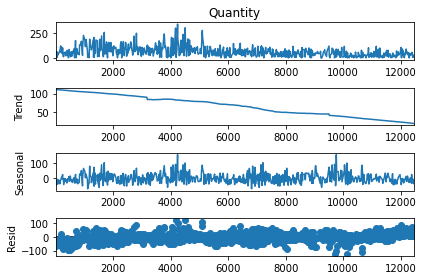

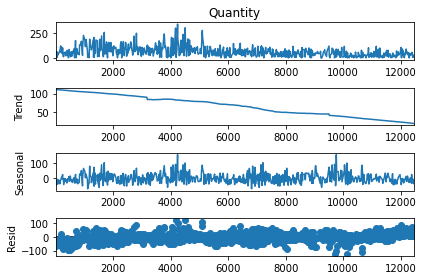

In [146]:
result.plot()

In [147]:
# result.trend.plot()

In [148]:
# result.resid.plot()

In [149]:
# plt.title('')
# result.plot()

In [150]:
se_out1= pd.DataFrame()

se_out1['Trend'] = result.trend
se_out1['seasonal']  = result.seasonal
se_out1['resid']  = result.resid


In [151]:
se_out1

,Trend,seasonal,resid
9,111.760622,-19.378970,-62.952792
20,111.641747,-44.287470,-45.043657
44,111.522872,-28.785503,-23.406709
48,111.403997,-14.954004,-30.345773
57,111.285123,-40.058936,-60.985707
...,...,...,...
12403,18.454608,-7.147952,29.242595
12413,18.330728,-17.153867,8.424139
12425,18.206847,-7.374545,21.508278
12440,18.082967,-36.987984,28.534407


In [152]:
df = pd.concat([data_df2,se_out1], axis=1 )
df

,Date,Quantity,Trend,seasonal,resid
9,2020-01-02,29.42886,111.760622,-19.378970,-62.952792
20,2020-01-03,22.31062,111.641747,-44.287470,-45.043657
44,2020-01-05,59.33066,111.522872,-28.785503,-23.406709
48,2020-01-06,66.10422,111.403997,-14.954004,-30.345773
57,2020-01-07,10.24048,111.285123,-40.058936,-60.985707
...,...,...,...,...,...
12403,2022-11-22,40.54925,18.454608,-7.147952,29.242595
12413,2022-11-23,9.60100,18.330728,-17.153867,8.424139
12425,2022-11-25,32.34058,18.206847,-7.374545,21.508278
12440,2022-11-26,9.62939,18.082967,-36.987984,28.534407


In [154]:
111.760622 + (-19.378970) + (-62.952792)

29.42886

In [57]:
# result1=seasonal_decompose(data_df2['Quantity'], model='Additive', period=1)

In [58]:
# result1.seasonal.plot()

In [59]:
# result1.trend.plot()

In [60]:
# result1.resid.plot()

In [62]:
result.resid.var()

0.21676896657759687

In [64]:
result.resid.var()

0.21676896657759687

In [65]:
result.seasonal.var()

0.21962591772215567

In [66]:
(result.resid+result.seasonal).var()

0.4363948842997524

In [75]:
#strength of seasonality Lakewook, Chicken 

mn = max(0,(1-result.resid.var()/(result.resid+result.seasonal).var()))
mn

0.5032733554486357

In [68]:
#Formula for  strength of seasonality

# max(0,(1-decomposition.resid.var()/(decomposition.resid+decomposition.seasonal).var())[0])

In [28]:
se_out1= pd.DataFrame()

se_out1['Trend'] = result.trend
se_out1['seasonal']  = result.seasonal
se_out1['resid']  = result.resid

In [30]:
# se_out

In [32]:
df = pd.concat([data_df2,se_out1], axis=1 )

In [33]:
df

,Date,Quantity,Trend,seasonal,resid
0,2020-01-02,172.55461,172.55461,1.0,1.0
14,2020-01-03,197.22689,197.22689,1.0,1.0
31,2020-01-04,257.69748,257.69748,1.0,1.0
37,2020-01-05,429.74791,429.74791,1.0,1.0
49,2020-01-06,269.05040,269.05040,1.0,1.0
...,...,...,...,...,...
12397,2022-11-22,148.59689,148.59689,1.0,1.0
12407,2022-11-23,220.40310,220.40310,1.0,1.0
12421,2022-11-25,116.42635,116.42635,1.0,1.0
12434,2022-11-26,121.77520,121.77520,1.0,1.0


### All in One 

In [155]:
data_df['Location'].unique()

array(['LAKEWOOD', 'HAYWARD', 'FREMONT', 'S SAN FRANCISCO BUS CTR',
       'RICHMOND CA'], dtype=object)

In [85]:
# df['Item'].unique()

In [76]:
for i in data_df['Location'].unique():
    df= data_df[data_df['Location']==i]
    for j in df['Item'].unique():
        item_data= df[df["Item"]==j]
        
        item_data= item_data.drop(['Location', 'Item'], axis=1)
#         train_dates = pd.to_datetime(item_data['Date']) 
        item_data.set_index('Date')
#         print(item_data)
        time_series = item_data.index  #Get dates for test data
        
        
        result=seasonal_decompose(item_data['Quantity'], model='multiplicable', period=365, extrapolate_trend= 'freq')
        
        #Results
#         se_out= pd.DataFrame()
#         se_out['Trend'] = result.trend
#         se_out['seasonality']  = result.seasonal
#         se_out['remainder']  = result.resid
# #         se_out['Date']= train_dates.values
#         df_out = pd.concat([item_data,se_out], axis=1 )
        result_SOS = max(0,(1-result.resid.var()/(result.resid+result.seasonal).var()))
        
        col_names =  ['Strength_of_Seasonality']
        Error_matric= pd.DataFrame(columns = col_names)
        
        my_out = {'Strength_of_Seasonality': result_SOS}
        Error_matric.loc[len(Error_matric)] = my_out 
        
        #Saving Results 
        Error_matric['Location']= i
        Error_matric['Item']=j
        
        predction_output = "ModelOut\seasonality\SOS\season_" +i+"-"+j+".xlsx"
        Error_matric.to_excel(predction_output, index= False)
#         print(df_out)
  

In [77]:
import pandas as pd
import os
import glob

In [78]:
path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\\ModelOut\\seasonality\\SOS\\'
out_files = glob.glob(os.path.join(path, "*.xlsx"))
   

In [79]:
dfs= []


for f in out_files:
    dfs.append(pd.read_excel(f))
df=pd.concat(dfs, ignore_index=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Strength_of_Seasonality  14 non-null     float64
 1   Location                 14 non-null     object 
 2   Item                     14 non-null     object 
dtypes: float64(1), object(2)
memory usage: 464.0+ bytes


In [7]:
# df['Date'] = df['Date'].astype(str)

In [82]:
df= df.reindex(columns= ['Location', 'Item', 'Strength_of_Seasonality'])

In [83]:
df

,Location,Item,Strength_of_Seasonality
0,FREMONT,CHICKEN XXXXX - O,0.447027
1,FREMONT,DRUMSTICKS NNNN,0.343056
2,FREMONT,FILLET QQQQ,0.348952
3,HAYWARD,CHICKEN XXXXX - O,0.465768
4,HAYWARD,DRUMSTICKS NNNN,0.338501
5,HAYWARD,FILLET QQQQ,0.330191
6,LAKEWOOD,CHICKEN XXXXX - O,0.503273
7,LAKEWOOD,DRUMSTICKS NNNN,0.338983
8,LAKEWOOD,FILLET QQQQ,0.365858
9,RICHMOND CA,CHICKEN XXXXX - O,0.486050


In [84]:
df.to_excel('SOS_all.xlsx', index=False)